In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [6]:
data = pd.read_csv('статистика/water.csv', sep=",")

In [7]:
data.drop('Unnamed: 0', axis='columns')

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


# Задание 1

<AxesSubplot: title={'center': 'Зависимость между смертностью и жесткостью воды'}, xlabel='mortality', ylabel='hardness'>

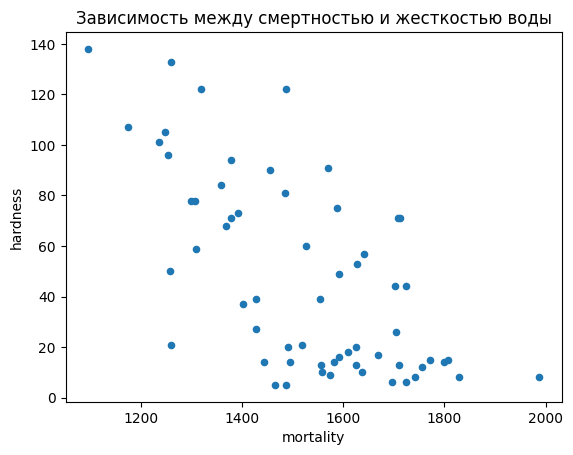

In [8]:
mort_vs_hard = data[['mortality', 'hardness']]
mort_vs_hard.plot(kind='scatter', 
        x='mortality', 
        y='hardness', 
        title='Зависимость между смертностью и жесткостью воды')

## Коэффициент Пирсона

In [9]:
data[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


## Коэффициент Спирмана

In [10]:
data[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


Исходя из полученных коэффициентов Пирсона и Спирмана имеем среднюю обратную зависимость. 

## Линейная регрессионная модель

In [11]:
X = data[['mortality']]
y = data['hardness']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train, y_train)

LinearRegression()

In [15]:
model.coef_

array([-0.12670202])

In [16]:
model.intercept_

239.3678426140957

In [17]:
y_pred = model.predict(X_test)

In [18]:
model.score(X_test, y_test)

0.4948982822876836

Text(0, 0.5, 'hardness')

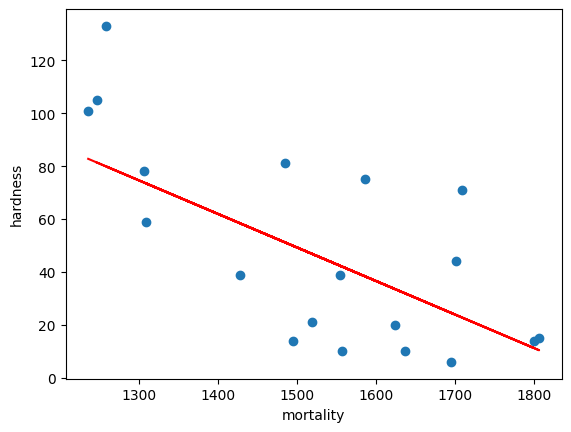

In [19]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.xlabel('mortality')
plt.ylabel('hardness')

## График остатков

In [20]:
X_const = sm.add_constant(X_train)

model_alt = sm.OLS(y_train, X_const)
result = model_alt.fit()

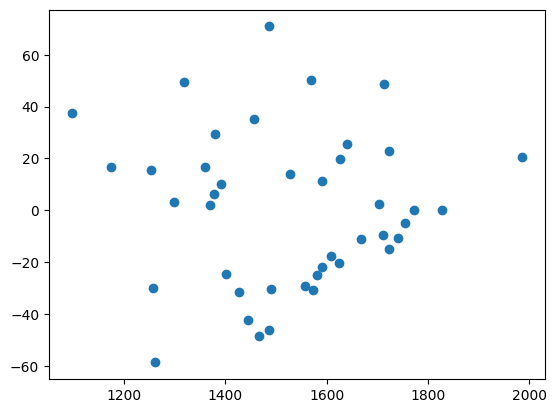

In [21]:
plt.scatter(X_const.iloc[:, 1], result.resid)

## ИТОГ  
В итоге получаем что зависимость смертности от жесткости воды либо незначительная (нехватает данных), либо ее вовсе нет.  
Полученные значения:  
a = -0.12670202
b = 239.3678426140957  
R2 = 0.4948982822876836

Коэффициент Пирсона = -0.654849  
Коэффициент Спирмана = -0.631665

# Задание 2

## Север

In [22]:
north = data[data['location'] == 'North']

<AxesSubplot: title={'center': 'Зависимость между смертностью и жесткостью воды'}, xlabel='mortality', ylabel='hardness'>

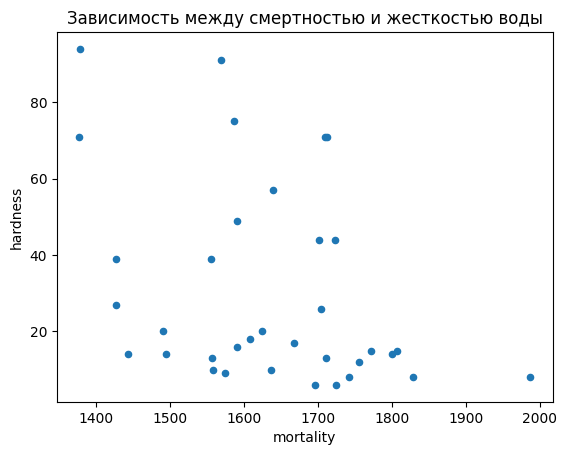

In [23]:
mort_vs_hard_north = north[['mortality', 'hardness']]
mort_vs_hard_north.plot(kind='scatter', 
        x='mortality', 
        y='hardness', 
        title='Зависимость между смертностью и жесткостью воды')

In [24]:
north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [25]:
north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [26]:
X = north[['mortality']]
y = north['hardness']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model_north = LinearRegression()
model_north.fit(X_train, y_train)

LinearRegression()

In [28]:
model_north.coef_

array([-0.09774218])

In [29]:
model_north.intercept_

191.7279767911201

In [30]:
y_pred = model_north.predict(X_test)

In [31]:
model_north.score(X_test, y_test)

-0.34863672627416764

Text(0, 0.5, 'hardness')

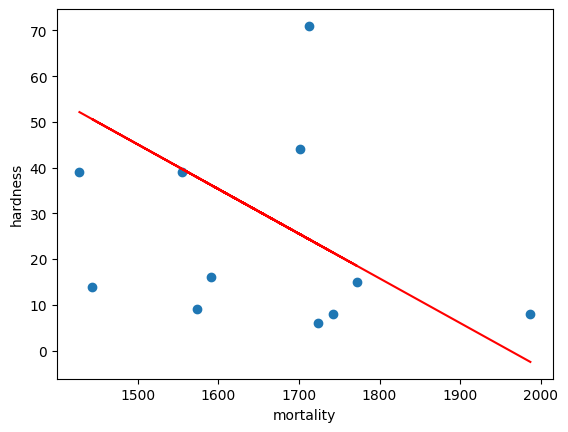

In [32]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.xlabel('mortality')
plt.ylabel('hardness')

## График остатков

In [33]:
X_const = sm.add_constant(X_train)

model_north_alt = sm.OLS(y_train, X_const)
result = model_north_alt.fit()

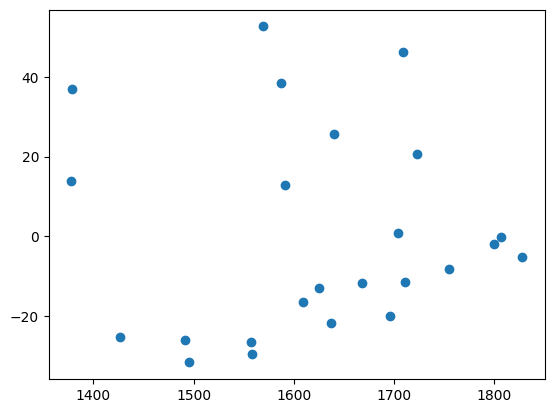

In [34]:
plt.scatter(X_const.iloc[:, 1], result.resid)

## ИТОГ  
Связь относительно общего построения сохраняется, но с другими значениями
В итоге получаем что зависимость смертности от жесткости воды либо незначительная (нехватает данных), либо ее вовсе нет.  
Полученные значения:  
a = -0.09774218  
b = 191.7279767911201   
R2 = -0.34863672627416764 (очень мало данных)

Коэффициент Пирсона = -0.368598  
Коэффициент Спирмана = -0.404208

## Юг

In [35]:
south = data[data['location'] == 'South']

<AxesSubplot: title={'center': 'Зависимость между смертностью и жесткостью воды'}, xlabel='mortality', ylabel='hardness'>

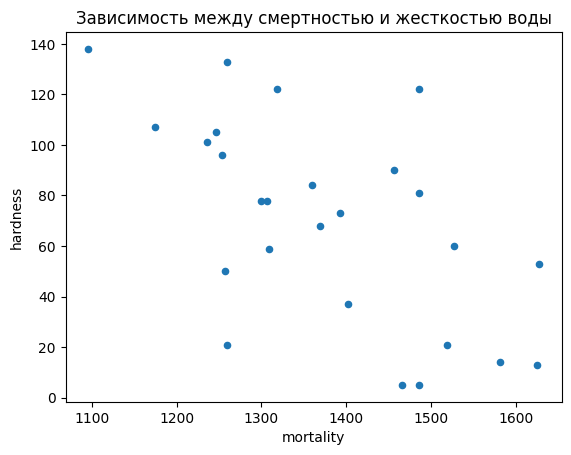

In [36]:
mort_vs_hard_south = south[['mortality', 'hardness']]
mort_vs_hard_south.plot(kind='scatter', 
        x='mortality', 
        y='hardness', 
        title='Зависимость между смертностью и жесткостью воды')

In [37]:
south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [38]:
south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [39]:
X = south[['mortality']]
y = south['hardness']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model_south = LinearRegression()
model_south.fit(X_train, y_train)

LinearRegression()

In [41]:
model_south.coef_

array([-0.18112812])

In [42]:
model_south.intercept_

324.1190746235986

In [43]:
y_pred = model_south.predict(X_test)

In [44]:
model_south.score(X_test, y_test)

-0.05226615794483802

Text(0, 0.5, 'hardness')

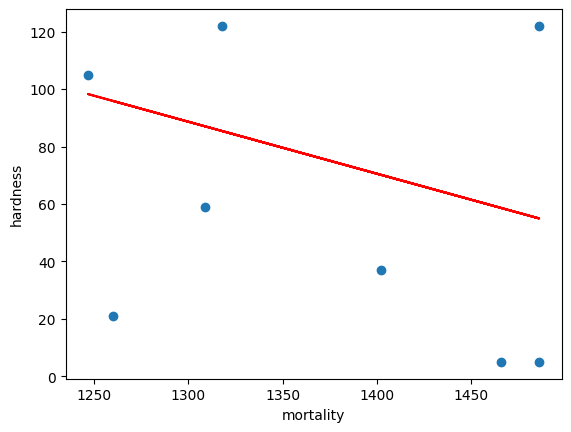

In [45]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.xlabel('mortality')
plt.ylabel('hardness')

## График остатков

In [46]:
X_const = sm.add_constant(X_train)

model_south_alt = sm.OLS(y_train, X_const)
result = model_south_alt.fit()

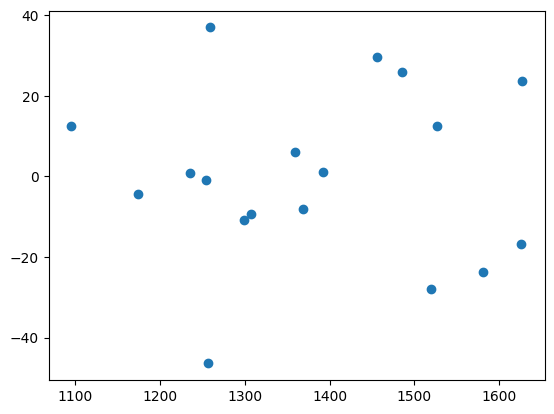

In [47]:
plt.scatter(X_const.iloc[:, 1], result.resid)

## ИТОГ  
Связь относительно общего построения сохраняется, но с другими значениями (но ближе к общим)
В итоге получаем что зависимость смертности от жесткости воды либо незначительная (нехватает данных), либо ее вовсе нет.  
Полученные значения:  
a = -0.18112812
b = 324.1190746235986  
R2 = -0.05226615794483802 (очень мало данных)

Коэффициент Пирсона = -0.602153  
Коэффициент Спирмана = -0.595723

# ОБЩИЙ ИТОГ

На основанииимеющихся данных можно сделать вывод, что зависимость смертности от жесткости воды либо незначительна, либо вовсе отсутствует. 